In [1]:
#My practice on PyTorch
# Original sources of this practice can be found in
#https://classroom.udacity.com/courses/ud188/

In [2]:
import torch
print(torch.__version__)

1.0.0.dev20181205


In [3]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

In [4]:
#for reproducable results set a seed for randomizations.
torch.manual_seed(7) # Set the random seed so things are predictable

# Get the MNIST data from torchvision
# if you want, change the batch size. 
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim #For Optimizing the loss(cost)function. 

In [6]:
# First, import latest PyTorch
import torch
print(torch.__version__)

1.0.0.dev20181205


In [7]:
# First run with PyTorch available functions. Code is mostly self readable.
model = nn.Sequential(nn.Linear(784, 128), #input layer
                      nn.ReLU(),
                      nn.Linear(128, 32),  #hiden layer
                      nn.ReLU(),
                      nn.Linear(32, 10),  #hiden layer
                      nn.LogSoftmax(dim=1)) #activation to get probablities for each output

##the negative log likelihood loss, nn.NLLLoss
criterion = nn.NLLLoss()#loss (cost) function is called the criterion to be optimized.
#optimizer object is initilized as follows, lr is the learning rate
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # This line is specific to PyTorch not to accumulate the gradients at each iteration.
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9467678181906498
Training loss: 0.9087285091882067
Training loss: 0.5548092122398206
Training loss: 0.44350921349929595
Training loss: 0.39096257233543436


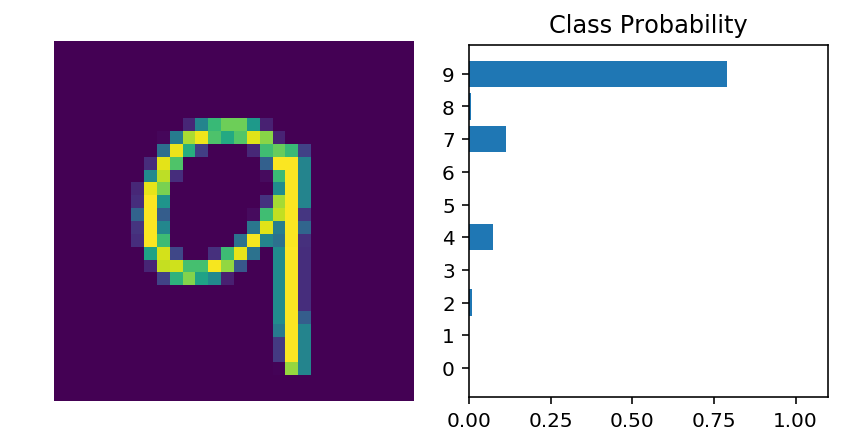

In [8]:
#It looks the model reduced the loss function and working as intended.
#Lets see what it gives after the training.

%matplotlib inline
#for a nice visulization, we will uze helper module of Udacity course. 
#   which should be in the same folder as this notebook.
import helper

images, labels = next(iter(trainloader)) # this provides new images for testing the model.

img = images[0].view(1, 784)
#Turn off gradients (this is model testing!) 
#You can turn off gradients for a block of code with the torch.no_grad()
with torch.no_grad():
    logps = model(img)

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)


In [9]:
print(model[2])
print(model[2].weight)
print('Gradient -', model[2].weight.grad) #we can get gradients at each layer!

Linear(in_features=128, out_features=32, bias=True)
Parameter containing:
tensor([[ 0.0149, -0.0075, -0.0355,  ...,  0.0886,  0.0150,  0.0865],
        [ 0.0408, -0.0341,  0.0618,  ...,  0.0191,  0.1095,  0.0867],
        [ 0.0730, -0.0516,  0.0719,  ...,  0.0750, -0.0106, -0.0280],
        ...,
        [ 0.0379, -0.0834,  0.0150,  ...,  0.0630, -0.0842,  0.0472],
        [-0.0460, -0.0166,  0.0526,  ...,  0.0524,  0.0571,  0.0828],
        [ 0.0068,  0.0798,  0.0168,  ...,  0.0292, -0.0891, -0.0973]],
       requires_grad=True)
Gradient - tensor([[ 0.0494,  0.0033,  0.0000,  ...,  0.0152,  0.0266,  0.0193],
        [-0.0635, -0.0102,  0.0000,  ..., -0.0167, -0.0367, -0.0308],
        [-0.0172, -0.0019,  0.0000,  ..., -0.0057, -0.0049, -0.0068],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0006, -0.0003,  0.0000,  ..., -0.0039,  0.0015,  0.0028]])


In [10]:
print(model[4])
model[4].weight

Linear(in_features=32, out_features=10, bias=True)


Parameter containing:
tensor([[ 0.3168, -0.1083, -0.1158, -0.1205,  0.3255,  0.0762, -0.1751,  0.2457,
          0.1131, -0.0437,  0.0696, -0.4112, -0.1069, -0.1772,  0.0072,  0.1940,
          0.0373,  0.3112,  0.3497, -0.1683,  0.0848,  0.0209,  0.1769,  0.1441,
         -0.1918, -0.0661, -0.1273,  0.1604, -0.0580,  0.0861, -0.1765, -0.3111],
        [-0.0129,  0.1997,  0.0478,  0.1586, -0.1735, -0.1269,  0.2885, -0.2005,
          0.2187, -0.1452,  0.0019,  0.2877,  0.1432, -0.1801,  0.0708, -0.3483,
          0.1842, -0.1521, -0.2603,  0.0976, -0.0851, -0.2296,  0.0642, -0.0117,
          0.3186, -0.1696,  0.3581, -0.1746, -0.1157,  0.0107, -0.1633, -0.1660],
        [ 0.1931,  0.4290,  0.0021,  0.1671,  0.3113,  0.1482, -0.2360, -0.0893,
         -0.0588, -0.1296,  0.1177,  0.2565,  0.1261, -0.2537, -0.1407,  0.1698,
         -0.1119,  0.2271, -0.0964,  0.0885, -0.2839,  0.1739, -0.2718, -0.0111,
         -0.1088, -0.0901,  0.3235,  0.2980,  0.1622, -0.1499,  0.1151, -0.0848],
   

In [11]:
#model object provide paramteres in sequential order starting from 0.
#activation outputs  do not have weight parameters.
#Let's print all the model components from the object model.
[print(x) for x in model]

Linear(in_features=784, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=10, bias=True)
LogSoftmax()


[None, None, None, None, None, None]

In [12]:
#better practice for setting #NN perceptrons.
# Set hyperparameters for the network seperately
input_size = 784
hidden_sizes = [128, 32]
output_size = 10

# Let's add names to each model layer. 
#Then we do not have to use indices in the model object.

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('LogSoftmax', nn.LogSoftmax(dim=1))]))
                    #activation to get probablities for each output. 
                    #dim=1 works on columns. For each output, seperate probability.


##the negative log likelihood loss, nn.NLLLoss
criterion = nn.NLLLoss()#loss (cost) function is called the criterion to be optimized.
#optimizer object is initilized as follows, lr is the learning rate
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # This line is specific to PyTorch not to accumulate the gradients at each iteration.
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9345243864222121
Training loss: 0.9274066845173521
Training loss: 0.5593829216606327
Training loss: 0.4523042079799973
Training loss: 0.4009161371348509


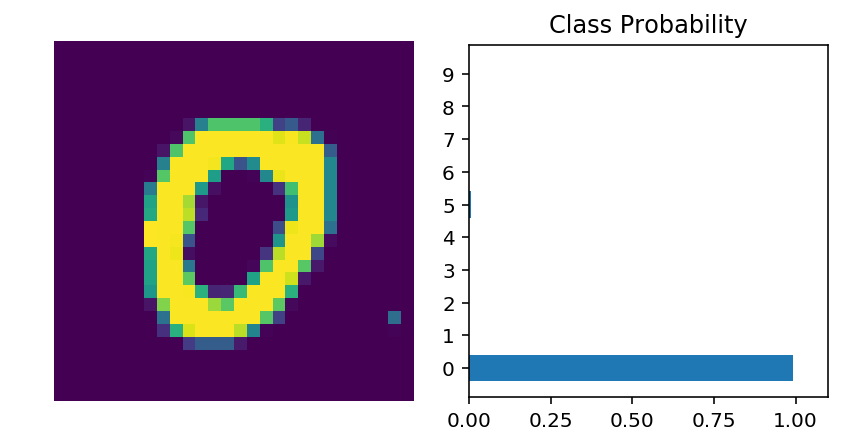

In [13]:
#Lets see what it gives after the training.

%matplotlib inline
import helper

images, labels = next(iter(trainloader)) # this provides new images for testing the model.

img = images[0].view(1, 784)
#Turn off gradients (this is model testing!) 
#You can turn off gradients for a block of code with the torch.no_grad()
with torch.no_grad():
    logps = model(img)

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [14]:
#use the assigned labels to access parameters
print(model[2])
print(model.fc2)
print(model.fc2.weight)
print('Gradient -', model.fc2.weight.grad) #we can get gradients at each layer!

Linear(in_features=128, out_features=32, bias=True)
Linear(in_features=128, out_features=32, bias=True)
Parameter containing:
tensor([[ 0.0881,  0.0065, -0.0873,  ...,  0.1583,  0.1414,  0.0107],
        [ 0.1500, -0.1003, -0.0389,  ...,  0.0210,  0.0655, -0.0358],
        [ 0.0699, -0.0121,  0.0673,  ..., -0.0080,  0.0834,  0.0049],
        ...,
        [ 0.0463,  0.0513, -0.0403,  ...,  0.1298, -0.0915,  0.0715],
        [ 0.0963,  0.0401, -0.0955,  ..., -0.0397, -0.1095, -0.0516],
        [-0.0530,  0.0378,  0.0055,  ..., -0.0091,  0.0321,  0.0261]],
       requires_grad=True)
Gradient - tensor([[ 2.8978e-02,  2.8501e-03, -3.4530e-03,  ...,  1.6757e-02,
         -3.8375e-03,  0.0000e+00],
        [ 4.8928e-03,  5.2775e-03,  1.3335e-03,  ...,  7.2881e-03,
          1.9913e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 1.6715e-02,  3.7063e-05, -1.8800e-03,  ...,  3.8116e-03,
         -5.9